<table style="width:100%">
  <tr>
    <th align="right"><img src="img/dilogo.png" style="float:left;height:90px"></th>
    <th align="center">
    <h1 align="center">Laboratorio 2</h1>
    <h2 align="center">Profesor: Ricardo Ñanculef</h2>
    <h3 align="center">Ayudante: Gabriel Ortega</h3>
    <h3 align="center">Alumno1;rol;malla</h3>
    <h3 align="center">Alumno2;rol;malla</h3>
    <h3 align="center">Septiembre de 2019</h3>
    </th> 
    <th align="left"><img src="img/usmlogo.png" style="float:right;height:85px"></th>
  </tr>

> <font size = "+2"><b>Antes de corregir se correrá su notebook utilizando la función Cell $\rightarrow$ Run All.</b> <br> <br>
Es posible que las simulaciones en este laboratorio se tarden un poco más en ejecutarse, sin embargo, mantenga un tope de 5 minutos.
</font>


## Instrucciones

La modalidad de trabajo será mediante el uso de jupyter notebook. El notebook debe ser desarrollado en parejas o individual y ser entregado el 15 de octubre de 2019.

La **modalidad de entrega será un archivo Apellido1_Apellido2_Lab2.zip** que contenga un notebook que incluya todas las preguntas con sus respectivas respuestas, un README que indique la forma correcta de ejecutar su notebook y cualquier archivo/carpeta extra que considere necesario para el correcto funcionamiento de su tarea (no es necesario adjuntar los .csv que se utilicen para trabajar). El laboratorio puede ser trabajado tanto en lenguaje R como en python 3 (para los que usen python 2.X, absténganse a las consecuencias). Lea bien el enunciado.


**Cualquier copia detectada implicará nota 0 en el laboratorio correspondiente y se notificará la situación al profesor.**




## 1. La paradoja del cumpleaños

La paradoja del cumpleaños es un problema matemático cuya respuesta es sorprendente dado el contexto del problema. En esta sección usted trabajará con este problema y podrá encontrar la respuesta que sorprendió a muchos. La paradoja es la siguiente: $N$ personas se reunen casualmente ¿Cuál es la probabilidad de que al menos 2 de ellas estén de cumpleaños el mismo día? **Considere año normal de 365 días.**

> a) Plantee la obtención de esta probabilidad en función de N. *Hint:* $\frac{Casos\;favorables}{Casos\;posibles}$


In [68]:
def paradox(n):
    
    probabilidad_all_differents = 1
    
    for x in range(0,n):
        probabilidad_all_differents = (365.0-x)/365.0 * probabilidad_all_differents 
    return 1 - probabilidad_all_differents




* El programa anterior simula la siguiente función de probabilidad en función de el N, que representa la cantidad de personas en la reunión:

* Con:

$D = Cantidad\;de\;dias\;de\;un\;año$

* La funcion de probabilidad es

$   
f(N) = 
     \begin{cases}
       1-\frac{D!}{(D)^N \cdot (D\;-\;N)! } &\quad\text{Si }1\leq\text{N} \leq365 \\
       1 & \text{etoc}
     \end{cases}
$



> b) Simule la paradoja del cumpleaños con varios $N \in [2,365]$ y obtenga la probabilidad empírica de encontrar dos personas con el mismo cumpleaños. Luego haga un gráfico de estas probabilidades en función de $N$ y la fórmula obtenida en a) y compare. 

*Tip: Como el orden de ejecución es $N\cdot Simulaciones$ no es necesario que vaya de 1 en 1 con los $N$ puede ir de 3 en 3, 5 en 5, etc.*

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

%matplotlib inline
def paradox(n):
    
    probabilidad_all_differents = 1
    
    for x in range(0,n):
        probabilidad_all_differents = (365.0-x)/365.0 * probabilidad_all_differents 
    return 1 - probabilidad_all_differents


probs = []

cantidad_reunion = []

teorica = []

random.seed(3)

for x in range(2,366):
    unicos = [] # cantidad de fechas q se repiten
    for i in range(0,1000):
        i = 0
        cumpleaños = {}
        cump = np.random.choice(range(1,366),x)
        if len(set(cump)) == len(cump):
            unicos.append(1)
        else:
            unicos.append(0)
    cantidad_reunion.append(x)
    p_cant = sum(unicos)/len(unicos)

    probs.append(1-p_cant)
    teorica.append(paradox(x))

creator = {"Invitados" : cantidad_reunion ,"Probabilidad Simulación" : probs,"Probabilidad Teorica" : teorica }

df_invitados = pd.DataFrame(creator)

fig, ax = plt.subplots(figsize=(15,10))

plt.xlabel('Invitados')
plt.ylabel('Probabilidad')
plt.title('Grafico de Invitados vs Probabilidad')

ax.plot(df_invitados["Invitados"], df_invitados["Probabilidad Simulación"], color = "blue")

ax.plot(df_invitados["Invitados"], df_invitados["Probabilidad Teorica"] , color = "red")


plt.show()


    

KeyboardInterrupt: 

>c) Mediante simulación obtenga la cantidad de personas necesarias que debe asistir a la reunión para que la probabilidad de que al menos 2 personas estén de cumpleaños sea: 50%, 70% y 95%. Luego, para cada cantidad encontrada compare el valor de su probabilidad teórica mediante la fórmula que encontró en a). 

¿A qué se debe que al encontrar un valor empírico y evaluarlo en la fórmula de a) se observe un valor diferente que el encontrado? Si esto no le sucedió en su simulación, responda poniéndose en la siguiente situación:

- Su simulación le arrojó que 30 es el 50%
- F(30) es 0.45, claramente no llega al 50% (de ejemplo solamente)



¿A qué se debe ese error?

* Este error se debe netamente a que la simulación intenta realizar una aproximación del modelo matematico planteado,esta aproximacion es realizada con el metodo de montecarlo,esto a traves de la generación de N cumpleaños aleatorios en K reuniones con N invitados. Es por lo anterior que debe simularse K veces por cada N cantidad de invitados, ya que el comportamiento promedio en este caso nos proporcionara el valor simulado, mientras que el modelo analitico a partir de la función de probabilidad en a) depende unicamente de un calculo numerico con cada cantidad de N invitados.

A continuación se muestran las probabilidades simuladas y teoricas para cada cantidad de invitados:

In [ ]:
print (df_invitados.head(60))

>d) Si ahora nos interesa cuando 3, 4, 5 y 6 personas están de cumpleaños el mismo día. Realice un gráfico similar al del inciso b) pero esta vez con $P_{i}$ en función de $N$ donde $i \in [2,6]$ Concluya respecto al comportamiento de las gráficas.

In [ ]:
p3=[]
p4=[]
p5=[]
p6=[]

cantidad_reunion = []

teorica = []

random.seed(3)

for x in range(2,366):
    probs_3 = []
    probs_4 = []
    probs_5 = []
    probs_6 = []
    for i in range(0,1000):
        i = 0
        cumpleaños = {}
        cump = np.random.choice(range(1,366),x)
        for fecha in cump:
            if fecha in cumpleaños:
                cumpleaños[fecha] += 1
            else:
                cumpleaños[fecha] = 1
        if 6 in cumpleaños.values():
            probs_6.append(1)
        else:
            probs_6.append(0)
        if 5 in cumpleaños.values():
            probs_5.append(1)
        else:
            probs_5.append(0)
        if 4 in cumpleaños.values():
            probs_4.append(1)
        else:
            probs_4.append(0)
        if 3 in cumpleaños.values():
            probs_3.append(1)
        else:
            probs_3.append(0)
    cantidad_reunion.append(x)
    p3.append(sum(probs_3)/len(probs_3))
    p4.append(sum(probs_4)/len(probs_4))
    p5.append(sum(probs_5)/len(probs_5))
    p6.append(sum(probs_6)/len(probs_6))
    
    
creator = {"Invitados" : cantidad_reunion ,"Probabilidad 3" : p3,"Probabilidad 4" : p4,"Probabilidad 5" : p5,"Probabilidad 6" : p6 }

df_invitados = pd.DataFrame(creator)

fig, ax = plt.subplots(figsize=(15,10))

plt.xlabel('Invitados')
plt.ylabel('Probabilidad')
plt.title('Grafico de Invitados vs Probabilidad')

ax.plot(df_invitados["Invitados"], df_invitados["Probabilidad 3"], color = "blue")

ax.plot(df_invitados["Invitados"], df_invitados["Probabilidad 4"] , color = "red")

ax.plot(df_invitados["Invitados"], df_invitados["Probabilidad 5"] , color = "yellow")

ax.plot(df_invitados["Invitados"], df_invitados["Probabilidad 6"] , color = "black")


plt.show()



* A partir del grafico se puede observar que a medida que se quiere más invitados con un mismo cumpleaños, se necesitan mas personas invitadas para subir la probabilidad de que ese fenomeno ocurra, es decir , la repetición de un cumpleaños depende directamente de cuanta cantidad de gente ha sido invitada a la reunión.

>e) Debido a una falla espacio-temporal usted ha sido re-ubicado a otra dimensión donde los años tienen 1000 días. Necesita comprar algo para comer y no morir de hambre mientras los científicos de dicho universo lo intentan enviar de vuelta a casa. Usted ha decidido apostar con una persona con la base de la paradoja del cumpleaños. ¿Cuántas personas debería haber en la junta para tener al menos una certeza del 90% de que ganará la apuesta?

In [ ]:
def paradox_1000(n):
    
    probabilidad_all_differents = 1
    
    for x in range(0,n):
        probabilidad_all_differents = (1000-x)/1000.0 * probabilidad_all_differents 
    return 1 - probabilidad_all_differents

probabilidad = 0
n=2
while probabilidad<0.9:
        probabilidad = paradox_1000(n)
        n+=1
print("Se necesitan "+ str(n) + " personas para estar un 90% seguros de ganar la apuesta")

>f) ¿Cuál es la probilidad de que una persona tenga el mismo cumpleaños que usted? (365 días)

In [ ]:
def paradox_propio(n):
    return 1 - (364/365.0)**n

print("La probabilidad de que una persona tenga el mismo cumpleaños mio en una reunion de 1000 personas es : " + str(paradox_propio(253)))

## 2. Redes Complejas



El tema de Redes Complejas (grafos con muchos nodos) ha estado creciendo últimamente, sus orígenes se remontan a fines de los 90. Una de las propuestas para modelar la construcción de estas redes es la siguiente:

1. Se inicia con un solo nodo 
2. En cada iteración se agrega un nuevo nodo.
3. La probabilidad de unirse a un nodo viene dado por la siguiente expresión: $ P(Unirse\,al\,nodo_i) = \frac{Grado\,Nodo_i}{Grado\,Total\,Grafo}$ donde el Grado Total del Grafo corresponde a la suma de los grados de cada nodo perteneciente a este.
4. Se repite (2) y (3) varias veces hasta tener una red bastante grande.

A este tipo de red se les conoce como "Scale Free".

Un listado de links para refrescar conceptos: 

* [Grafo](https://es.wikipedia.org/wiki/Grafo)
* [Grado de un nodo](https://es.wikipedia.org/wiki/Grado_(teor%C3%ADa_de_grafos))


>a) Simule grafos de: 100, 1000 y 5000 nodos de la forma indicada y haga un scatterplot de Cantidad de Nodos v/s Grado del Nodo para los 3 grafos.

* Recuerde que las probabilidades se modifican después de agregar un nodo.
* Puede hacer una única iteración de 5000 pasos y guardar el estado de la red en 1000, 5000 y 10000.
* La matriz de adyacencia le facilitará el trabajo de obtener el grado de cada nodo (no es necesario hacerla, pero si tiene problemas encontrando alguna estructura de datos, esta le puede servir).

Matriz de Adyacencia:

Es una matriz cuadrada de $NxN$ donde en la posición $i,j$ hay un 1 si entre los nodos $i$ y $j$ hay una arista, de lo contrario esa entrada es 0. La diagonal en este casó será de 0 solamente.




In [ ]:
%%time
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


def get_grade(nodo, grafo):
    return len(grafo[nodo])

def get_total_grade(grafo):
    suma = float(0)
    for x in grafo.values():
        suma += len(x)
    return suma

def probas(grafo):
    nodes = list(grafo.keys())
    nodes.sort()
    probas = []
    total = get_total_grade(grafo)
    for x in nodes :
        probas.append(get_grade(x,grafo)/total)
    return probas





random.seed(3)

n = 10000


grafo = dict()

nodo_ini1 = random.randint(0,n)
nodo_ini2 = random.randint(0,n)

grafo[nodo_ini1] = [nodo_ini2]
grafo[nodo_ini2] = [nodo_ini1]


red_1k  =  dict()
red_5k  =  dict()
red_10k =  dict()

future_nodes = [i for i in range(n) if i not in [nodo_ini1,nodo_ini2]]

for nodo in future_nodes:
    probs = probas(grafo)
    opciones = list(grafo.keys())
    opciones.sort()
    probs.sort()
    randomNodo = np.random.choice(opciones,1, p=probs)
    grafo[randomNodo[0]].append(nodo)
    if nodo in grafo:
        grafo[nodo].append(randomNodo[0])
    else:
        grafo[nodo] = [randomNodo[0]]
    if len(grafo) == 1000:
        red_1k = dict(grafo)
    if len(grafo) == 5000:
        red_5k = dict(grafo)
    if len(grafo) == 10000:
        red_10k = dict(grafo)
        
graficar = [red_1k,red_5k,red_10k] 


for grafo_graphic in graficar:
    plt.figure(figsize=(10,12))
    nodos_k = list(grafo_graphic.keys())
    nodos_k.sort()

    grados = []

    for node_k in nodos_k:
        grados.append(len(grafo_graphic[node_k]))

    creator_k = {"Nodo" : nodos_k ,"Grados" : grados }

    df = pd.DataFrame(creator_k)

    unicos = df["Grados"].unique()
    cantidad = []

    for valor in df["Grados"].unique():
        cuantos = df[df["Grados"] == valor]["Nodo"].size
        cantidad.append(cuantos)

    creator_scatter_k = {"Grado" : unicos ,"Cuantos" : cantidad }

    df_scatter_k = pd.DataFrame(creator_scatter_k)


    plt.scatter(df_scatter_k["Cuantos"],df_scatter_k["Grado"])

    plt.xlabel('Cantidad')
    plt.ylabel('Grado')
    plt.title('Cantidad de nodos vs Grado de los nodos')

    plt.plot()
    plt.show()

>b) Observando los gráficos realizados en a) ¿Qué puede decirse acerca de la distribución de grado?

* A partir de los scatter plot se puede determinar que la distribución que siguen los nodos es una ley de potencia, que quiere decir esto, que hay muy pequeña cantidad de nodos que poseen un alto grado y por otro lado hay una amplia cantidad de nodos con un grado muy bajo. En redes complejas, a los nodos con alto grado se les denomina "hubs". Esto tambien habla de que si se arma una red compleja con este modelo (Barabasi Albert), la red a medida que se contruye seguira el patron de "The rich get richer and the poor get poorer" , que significa que los nodos que parten inicialmente con un mayor grado, seguiran aumentando su grado y los que se agreguen más tardiamente seguiran con grados muy pequeños.

>c) Si se quitan aristas con una probabilidad $\rho$ ¿Cómo cambia la distribución de grado del grafo de 10000 nodos? Genere gráficos de Cantidad de Nodos v/s Grado del Nodo para distintos valores de $\rho$ para ayudarle en su respuesta. ¿Sigue siendo de libre escala, pierde forma definida o se asemeja a otra distribución?

* A partir de los graficos , generados con probabilidades desde 0.1 hasta 0.9 de remover una arista, se puede decir que a partir de una probabilidad de 0,7 , la distribución de los grados comienza a perder su principal caracteristica que es ser una ley de potencia, ya que como se puede observar en los graficos, la caracteristica cola comienza a volverse cada vez más un unico punto y no un conjunto de puntos.


In [ ]:
random.seed(22)

probabilidad = 0.10



while probabilidad <= 0.9:
    copia = dict(red_10k)
    for x in list(copia.keys()):
        removibles = list(copia[x])
        for arista in removibles:
            select = random.random()
            if select <=probabilidad:
                removibles.remove(arista)
                cambio = list(copia[arista])
                cambio.remove(x)
                copia[arista] = cambio
        copia[x] = removibles
    
    for x in list(copia.keys()):
        if copia[x] == []:
            del copia[x]

    grafo_graphic = copia
    plt.figure(figsize=(8,6))
    nodos_k = list(grafo_graphic.keys())
    nodos_k.sort()

    grados = []

    for node_k in nodos_k:
        grados.append(len(grafo_graphic[node_k]))

    creator_k = dict({"Nodo" : nodos_k ,"Grados" : grados })

    df = pd.DataFrame(creator_k)
    unicos = df["Grados"].unique()
    cantidad = []
    for valor in unicos:
        cuantos = df[df["Grados"] == valor]["Nodo"].size
        cantidad.append(cuantos)

    creator_scatter_k = {"Grado" : unicos ,"Cuantos" : cantidad }

    df_scatter_k = pd.DataFrame(creator_scatter_k)


    plt.scatter(df_scatter_k["Cuantos"],df_scatter_k["Grado"])

    plt.xlabel('Cantidad')
    plt.ylabel('Grado')
    plt.title('Cantidad de nodos vs Grado de los nodos con probabilidad ' + str(probabilidad))

    plt.plot()
    plt.show()
    probabilidad += 0.10

## 3. Artistas Musicales

En esta sección usted cuenta con dos datasets "albums.csv" y "artists.csv", el primero cuenta con información de álbums musicales lanzados por diversos artistas como el número de ventas, el estilo musical, puntajes según distintos críticos, etc. El segundo contiene datos sobre diversos artistas, como su nombre, puesto en la banda, pais de origen, etc. 

Para información más detallada de los datasets [aquí](https://www.kaggle.com/revilrosa/music-label-dataset#artists.csv)

>a) Cargue ambos dataset, cuente la cantidad de celdas nulas por columna en c/u y limpielas si cree necesario. 

* Hay una unica columna con valores nulos en el dataset de artists.csv que es art_name (el nombre artistico del cantante si lo tiene). Mientras que el dataset de albums.csv, no hay columnas con valores nulos.

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

%matplotlib inline


data_albums = pd.read_csv("albums.csv")
data_artists = pd.read_csv("artists.csv")


for columna in data_albums.columns:
    nan_rows = data_albums[data_albums[columna].isnull()][columna]
    print("La columna " + columna + " tiene " + str(nan_rows.size) + " filas vacias")

    



for columna in data_artists.columns:
    nan_rows = data_artists[data_artists[columna].isnull()][columna]
    print("La columna " + columna + " tiene " + str(nan_rows.size) + " filas vacias")

    
data_artists = data_artists.drop(["art_name"],axis = 1)


La columna id tiene 0 filas vacias
La columna artist_id tiene 0 filas vacias
La columna album_title tiene 0 filas vacias
La columna genre tiene 0 filas vacias
La columna year_of_pub tiene 0 filas vacias
La columna num_of_tracks tiene 0 filas vacias
La columna num_of_sales tiene 0 filas vacias
La columna rolling_stone_critic tiene 0 filas vacias
La columna mtv_critic tiene 0 filas vacias
La columna music_maniac_critic tiene 0 filas vacias
La columna id tiene 0 filas vacias
La columna real_name tiene 0 filas vacias
La columna art_name tiene 16709 filas vacias
La columna role tiene 0 filas vacias
La columna year_of_birth tiene 0 filas vacias
La columna country tiene 0 filas vacias
La columna city tiene 0 filas vacias
La columna email tiene 0 filas vacias
La columna zip_code tiene 0 filas vacias


>b) Responda las siguientes preguntas utilizando recursos visuales (tablas, gráficos). 

* Haga un top 10 de los mejores álbumes para cada crítico
* En función del puntaje promedio, ordene los géneros musicales de mejor ranking a peor.
* Top 5 de países con álbumes mejor calificados.
* Top 10 de artistas con más albumes publicados.
* ¿Qué generos predominan en los artistas Chilenos?
* Separando a los artistas en los que nacieron antes de 1980 y de 1980 en adelante. Si consideramos los años 2005, 2010, 2015 y 2019 ¿cómo han ido evolucionando los puntajes promedio de ambos grupos con el paso del tiempo? ¿Es posible evidenciar alguna tendencia?
* Haga una línea del tiempo donde en cada año se indique los 3 géneros con más álbumes publicados* ¿Se evidencia alguna tendencia? Haga la misma línea de tiempo para algún páis en específico de su elección y compare, si en algún año no hubo publicación deje la casilla marcada con "-".

Para la línea del tiempo se sugiere un formato como el siguiente: 

| 2000 | 2001 | 2002 | 2003 | 2004 |
|------|------|------|------|------|
| 1°   | 1°   | 1°   | 1°   | 1°   |
| 2°   | 2°   | 2°   | 2°   | 2°   |
| 3°   | 3°   | 3°   | -   | 3°   |

* ¿Hay alguna diferencia en los géneros que artistas Chilenos, Argentinos, Peruanos y Bolivianos publicaban?

* Haga un top 10 de los mejores álbumes para cada crítico

In [71]:
criticos = ["rolling_stone_critic","mtv_critic","music_maniac_critic"]

for critico in criticos :
    data_top10 = data_albums.sort_values(critico,ascending=False)
    for c in criticos:
        if c != critico:
            data_top10 = data_top10.drop([c],axis = 1)
    
    print("El top 10 de albumens para el critico "+ critico + " es : ")
    print(data_top10.head(10))
    print("\n")
    print("\n")

El top 10 de albumens para el critico rolling_stone_critic es : 
          id  artist_id                             album_title        genre  \
42777  42778      43000                    Engineer Minangkabau          Pop   
84758  84759      25773                         Charming Jordan        Indie   
17596  17597      28588                         Ice Better have        Indie   
26734  26735       1997          American Boy Unfair The Asleep        Indie   
84748  84749       5259                  My Best Chemist Hungry       J-Rock   
52969  52970       2476  Kittens in My Heart Bulls In My Garden      Western   
31583  31584      33260             Under the Fiat Of Love Find       Latino   
44338  44339      23423                  Steel Fierce Kia Hills  Compilation   
26737  26738      19142                                  Bertie  Heavy Metal   
84736  84737      22851     Jollar Secretive Falling Additional     Boy Band   

       year_of_pub  num_of_tracks  num_of_sales  rolli

* En función del puntaje promedio, ordene los géneros musicales de mejor ranking a peor.

In [78]:

promedios = []

data_frame_mean = {"album" : data_albums["album_title"],"genero" : data_albums["genre"]}

for critico in criticos :
    data_frame_mean[critico] = data_albums[critico]
    
df_mean = pd.DataFrame(data_frame_mean)


df_mean["Promedio Critica"] = df_mean.mean(axis=1) 

generos = data_frame_mean["genero"].unique()

data_frame_genre = {"genero" : generos }

promedios = []
for genero  in generos:
    suma = df_mean[df_mean["genero"] == genero ]["Promedio Critica"].sum()
    total = df_mean[df_mean["genero"] == genero ]["Promedio Critica"].size
    promedio = suma/total
    promedios.append(promedio)

data_frame_genre["promedio"] = promedios

final_df = pd.DataFrame(data_frame_genre)

print(final_df.sort_values("promedio",ascending=False))


    

#generos = data_artists["genre"].unique()

#promedios =[]



#for genero in generos:
#    data_artists[data_artists["genre"] == genero]



          genero  promedio
35  Indietronica  2.794133
28    Deep House  2.791514
23          Live  2.784077
36    Holy Metal  2.783308
15          Jazz  2.769451
27       Country  2.768941
24         Blues  2.766943
13     Hard Rock  2.766719
6       Pop-Rock  2.765292
33          Punk  2.764545
16          Trap  2.762097
9          K-Pop  2.760070
25   Compilation  2.758196
21   Alternative  2.756121
30        Parody  2.752172
18           Rap  2.751584
0           Folk  2.751482
26        Gospel  2.751245
1          Metal  2.751206
20         Dance  2.750861
32          Rock  2.749518
22   Death Metal  2.747544
14     Unplugged  2.746765
10         Indie  2.744903
5    Progressive  2.744520
8        Western  2.743490
19   Heavy Metal  2.742874
2         Latino  2.742817
37   Electro-Pop  2.739443
3            Pop  2.737223
12        J-Rock  2.736757
29      Brit-Pop  2.732865
4    Black Metal  2.727778
11        Lounge  2.726251
17       Ambient  2.725898
34      Boy Band  2.721137
3

* Top 5 de países con álbumes mejor calificados.

In [73]:

promedios = []

new_df = pd.merge(data_albums, data_artists,  how='left', left_on=['artist_id'], right_on = ['id'])


data_frame_mean = {"album" : new_df["album_title"],"pais" : new_df["country"]}

for critico in criticos :
    data_frame_mean[critico] = data_albums[critico]
    
df_mean = pd.DataFrame(data_frame_mean)

for id_album in data_albums["id"]:
    promedio = 0

    promedio = promedio/3.0
    promedios.append(promedio)

df_mean["Promedio Critica"] = df_mean.mean(axis=1) 

paises = data_frame_mean["pais"].unique()

data_frame_genre = {"paises" : paises }

promedios = []
for pais  in paises:
    suma = df_mean[df_mean["pais"] == pais ]["Promedio Critica"].sum()
    total = df_mean[df_mean["pais"] == pais ]["Promedio Critica"].size
    promedio = suma/total
    promedios.append(promedio)

data_frame_genre["promedio"] = promedios

final_df = pd.DataFrame(data_frame_genre)

print(final_df.sort_values("promedio",ascending=False).head())



          paises  promedio
98       Namibia  2.876707
169    Australia  2.860554
23   Korea South  2.846759
216      Moldova  2.844828
73    Cape Verde  2.843600


* Top 10 de artistas con más albumes publicados.

In [74]:
%%time
artistas = new_df["real_name"].unique()


creator = {"artista" : artistas }

publicados = []

agrupados = new_df.groupby("real_name")



for artista in artistas:
    cuantos = agrupados.get_group(artista)["id_x"].size 
    publicados.append(cuantos)
    
creator["Publicados"] = publicados

df_publicaciones = pd.DataFrame(creator)


print(df_publicaciones.sort_values("Publicados",ascending=False).head(10))


                   artista  Publicados
10597  Mallory W. Sheppard          11
2961           Macey James          10
25648             Kim Hays           9
11812    Meghan Z. Nichols           9
13280       Yoshio Sherman           9
4802         Nissim Norton           9
1532            Marah Wood           9
4930     Urielle B. Abbott           9
26237          Doris Sykes           9
4342          Galvin Riggs           9
Wall time: 31.3 s


* ¿Qué generos predominan en los artistas Chilenos?

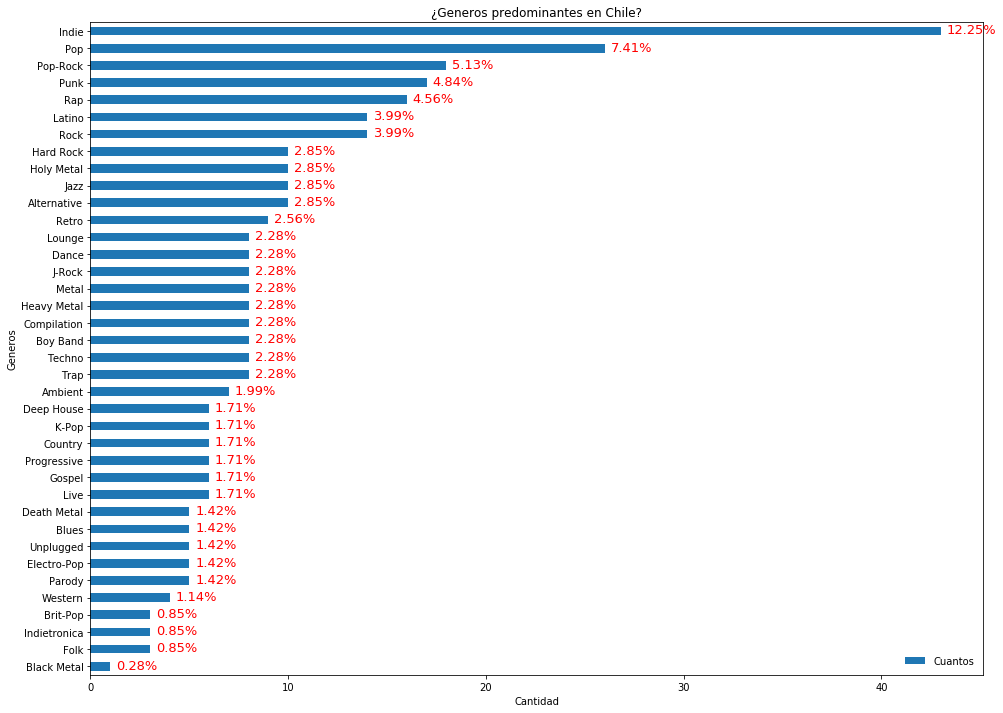

In [75]:
agrupados_pais = new_df.groupby("country")


cl = agrupados_pais.get_group("Chile")

unicos_gen = cl["genre"].unique()

generos_cl = cl.groupby("genre")

creator_cl = {"Genero" : unicos_gen}

cantidades = []

for gen in unicos_gen:
    cuantos = generos_cl.get_group(gen)["id_x"].size
    cantidades.append(cuantos)
    
creator_cl["Cuantos"] = cantidades

top_cl = pd.DataFrame(creator_cl)

top_cl = top_cl.sort_values(by=['Cuantos'])


ax = top_cl.plot(x="Genero", y="Cuantos", kind = "barh",figsize=(16,12))

plt.ylabel('Generos')
plt.xlabel('Cantidad')
plt.title("¿Generos predominantes en Chile?")

alturas = []

for a in ax.patches:
    alturas.append(a.get_width())

total = sum(alturas)

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.1, str(round((i.get_width()/total)*100,2))+"%",fontsize=13, color = "red")
ax. legend(loc='lower right', frameon=False)
    
plt.show()
    
    
    
    

* Separando a los artistas en los que nacieron antes de 1980 y de 1980 en adelante. Si consideramos los años 2005, 2010, 2015 y 2019 ¿cómo han ido evolucionando los puntajes promedio de ambos grupos con el paso del tiempo? ¿Es posible evidenciar alguna tendencia?

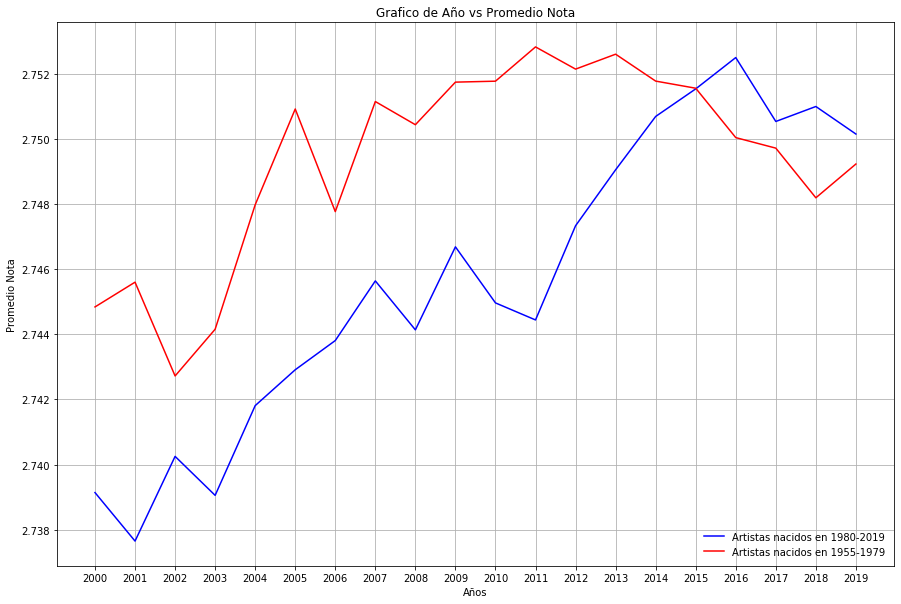

In [115]:
#filter1 = new_df["year_of_birth"] < 1980

#filter2 = new_df["year_of_birth"] >= 1980
  
# filtering data 

menor_1980 = new_df.where(new_df["year_of_birth"] < 1980) 

geq_1980 = new_df.where(new_df["year_of_birth"] >= 1980) 
  
menor_1980 = menor_1980.dropna()
geq_1980 = geq_1980.dropna()
# display 

anios = list(geq_1980["year_of_pub"].unique())

creator_le1980 = {"Año" : anios} 


creator_geq1980 = {"Año" : anios}


promedios =[]
for anio in anios :
    promedio = (menor_1980[menor_1980["year_of_pub"] <= anio]["rolling_stone_critic"].mean() + menor_1980[menor_1980["year_of_pub"] <= anio]["mtv_critic"].mean() + menor_1980[menor_1980["year_of_pub"] <= anio]["music_maniac_critic"].mean())/3.0
    promedios.append(promedio)
    
creator_le1980["Promedio"] = promedios 

promedios =[]
for anio in anios :
    promedio = (geq_1980[geq_1980["year_of_pub"] <= anio]["rolling_stone_critic"].mean() + geq_1980[geq_1980["year_of_pub"] <= anio]["mtv_critic"].mean() + geq_1980[geq_1980["year_of_pub"] <= anio]["music_maniac_critic"].mean())/3.0
    promedios.append(promedio)
    
creator_geq1980["Promedio"] = promedios 

df_leq = pd.DataFrame(creator_le1980)
df_geq = pd.DataFrame(creator_geq1980)

df_leq = df_leq.sort_values(by=['Año'])
df_geq = df_geq.sort_values(by=['Año'])

fig, ax = plt.subplots(figsize=(15,10))

plt.xlabel('Años')
plt.ylabel('Promedio Nota')
plt.title('Grafico de Año vs Promedio Nota')

ax.plot(df_geq["Año"], df_geq["Promedio"], color = "blue", label = "Artistas nacidos en 1980-2019" )


ax.plot(df_leq["Año"], df_leq["Promedio"] , color = "red" , label = "Artistas nacidos en 1955-1979")

ax.set_xticks(df_geq['Año'])

ax.grid(True )


ax.legend(loc='lower right', frameon=False)


plt.show()


* Haga una línea del tiempo donde en cada año se indique los 3 géneros con más álbumes publicados* ¿Se evidencia alguna tendencia? Haga la misma línea de tiempo para algún páis en específico de su elección y compare, si en algún año no hubo publicación deje la casilla marcada con "-".

In [150]:
anios = list(new_df["year_of_pub"].unique())

anios.sort()
generos = list(new_df["genre"].unique())

creator_timeline = {}



for anio in anios:
    aux = {"Genero": [] ,"Cuantos" : []}
    periodo = new_df[new_df["year_of_pub"] == anio].groupby("genre")
    for genero in generos:
        aux_df = periodo.get_group(genero)
        aux["Genero"].append(genero)
        aux["Cuantos"].append(aux_df["id_x"].size)
    df_anio = pd.DataFrame(aux)
    df_anio = df_anio.sort_values(by=["Cuantos"],ascending=False)
    creator_timeline[anio] = [df_anio.iloc[0]["Genero"],df_anio.iloc[1]["Genero"],df_anio.iloc[2]["Genero"]]

df_timeline = pd.DataFrame(creator_timeline)

display(df_timeline)

creator_timeline1 = {}

for anio in anios:
    aux = {"Genero": [] ,"Cuantos" : []}
    periodo = new_df[(new_df["year_of_pub"] == anio) & (new_df["country"] == "United States")].groupby("genre")
    generos = list(new_df[(new_df["year_of_pub"] == anio) & (new_df["country"] == "United States")]["genre"].unique())
    for genero in generos:
        aux_df = periodo.get_group(genero)
        aux["Genero"].append(genero)
        aux["Cuantos"].append(aux_df["id_x"].size)
    df_anio = pd.DataFrame(aux)
    df_anio = df_anio.sort_values(by=["Cuantos"],ascending=False)
    creator_timeline1[anio] = [df_anio.iloc[0]["Genero"],df_anio.iloc[1]["Genero"],df_anio.iloc[2]["Genero"]]

df_timeline1 = pd.DataFrame(creator_timeline1)

display(df_timeline1)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Indie,Indie,Indie,Indie,Indie,Indie,Indie,Indie,Indie,Indie,Indie,Indie,Indie,Indie,Indie,Indie,Indie,Indie,Indie,Indie
1,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop
2,Rap,Rap,Rap,Rap,Rap,Rap,Rap,Rap,Rap,Rap,Rap,Rap,Rap,Rap,Rap,Rap,Rap,Rap,Rap,Rap


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Country,Indie,Indie,Alternative,Rap,Pop,Pop,Rap,Indie,Pop,Pop,Indie,Rock,Rap,Pop,Indie,Indie,Pop,Rap,Pop
1,Latino,Alternative,Jazz,Indie,Deep House,Rap,Progressive,Pop,Country,Indie,Indie,Gospel,Progressive,Pop-Rock,Latino,Boy Band,Latino,Indie,Punk,Hard Rock
2,Indie,Rock,Pop,Rap,K-Pop,Lounge,Metal,Holy Metal,Live,Indietronica,Jazz,Rap,Lounge,Western,Indie,Rap,Pop,Lounge,Black Metal,Lounge


* ¿Hay alguna diferencia en los géneros que artistas Chilenos, Argentinos, Peruanos y Bolivianos publicaban?

In [153]:
for pais in ["Peru","Bolivia","Chile","Argentina"]:
    for anio in anios:
        aux = {"Genero": [] ,"Cuantos" : []}
        periodo = new_df[(new_df["year_of_pub"] == anio) & (new_df["country"] == pais)].groupby("genre")
        generos = list(new_df[(new_df["year_of_pub"] == anio) & (new_df["country"] == pais)]["genre"].unique())
        for genero in generos:
            aux_df = periodo.get_group(genero)
            aux["Genero"].append(genero)
            aux["Cuantos"].append(aux_df["id_x"].size)
        df_anio = pd.DataFrame(aux)
        df_anio = df_anio.sort_values(by=["Cuantos"],ascending=False)
        creator_timeline1[anio] = [df_anio.iloc[0]["Genero"],df_anio.iloc[1]["Genero"],df_anio.iloc[2]["Genero"]]

    df_timeline1 = pd.DataFrame(creator_timeline1)
    print("Linea de tiempo de " + pais)
    display(df_timeline1)

Linea de tiempo de Peru


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Trap,Indie,Indie,Rap,Latino,Pop,Rap,Pop-Rock,Folk,Folk,Heavy Metal,Indietronica,Death Metal,Pop-Rock,Indie,Heavy Metal,Indie,Pop,Holy Metal,J-Rock
1,Indie,Techno,Pop,Pop,J-Rock,Indie,J-Rock,Indietronica,Pop,Latino,Jazz,Boy Band,Hard Rock,Rap,Rock,Indie,K-Pop,Indie,Live,Pop
2,Hard Rock,Rap,Rock,Indie,Indie,Rock,Punk,Dance,Unplugged,Holy Metal,Indie,Latino,Compilation,Hard Rock,Pop,Blues,Progressive,Deep House,Punk,Blues


Linea de tiempo de Bolivia


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Brit-Pop,Rap,Indie,Indie,Pop,Pop,Indie,Indie,Rock,Indie,Rap,Compilation,Indie,Indie,Pop,Death Metal,Indie,Western,Pop,Pop-Rock
1,Pop,Latino,Death Metal,Jazz,Heavy Metal,Punk,Pop,Alternative,Deep House,Western,Progressive,Indie,Pop,Jazz,Indie,J-Rock,Dance,Ambient,Rap,Retro
2,Punk,Deep House,Indietronica,Pop,Dance,Live,Boy Band,Indietronica,Holy Metal,Indietronica,Trap,Folk,Dance,Unplugged,Metal,Pop,Unplugged,Latino,Techno,Rap


Linea de tiempo de Chile


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Rock,Indie,Alternative,Dance,Electro-Pop,Indie,Indie,Rap,Ambient,Indie,Lounge,Pop,Pop-Rock,Pop,Indie,Pop,Pop-Rock,Indie,Indie,Heavy Metal
1,Indie,Retro,Pop,Heavy Metal,Deep House,Gospel,Alternative,Indie,Lounge,Punk,Rap,Indie,Progressive,Pop-Rock,Latino,Blues,Latino,Heavy Metal,Pop,Ambient
2,Punk,Pop-Rock,Techno,Live,Brit-Pop,Pop,Pop-Rock,Rock,Indie,Rap,K-Pop,Holy Metal,Compilation,Blues,Punk,Indie,Retro,Jazz,Retro,Pop


Linea de tiempo de Argentina


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Pop,Deep House,Indie,Pop,Pop,Holy Metal,Indie,Trap,Rock,Rock,Pop,Indie,Lounge,Indie,Indie,Jazz,Metal,Punk,Punk,Rap
1,Boy Band,J-Rock,Pop,Jazz,Indie,Rock,Country,Techno,Pop,Pop-Rock,Folk,Rap,Rock,Unplugged,Pop,Alternative,Brit-Pop,Latino,Indietronica,Blues
2,Hard Rock,Folk,Punk,Dance,Blues,Indietronica,Rap,Latino,Folk,Compilation,Indie,Boy Band,Gospel,Boy Band,Lounge,Trap,Pop-Rock,Pop-Rock,Dance,Hard Rock


>c) Utilizando el siguiente subconjunto de países: "United States", "Chile", "Japan", ¿es el país un buen predictor del puntaje promedio? ¿Y viceversa? Responda utilizando criterios de probabilidad condicional y considere los intervalos del puntaje promedio en los percentiles: $[0,33],[34,66],[67,100]$. ¿Importa si se utiliza solo el subconjunto de datos o el dataset entero? 


**Bonus +10** El país como predictor del puntaje en cada crítico y viceversa.

>d) ¿Se puede decir que el género de un álbum es buen predictor del número de ventas? ¿Y viceversa? Responda utilizando criterios de probabilidad condicional. 

Fije los intervalos de las ventas en los cuartiles 

## Reglas del Juego y Comentarios 

+ Errores ortográficos, de redacción y oraciones ambiguas descontarán parte de su puntaje.
+ Las dudas deberán ser publicadas en moodle para que sus compañeros puedan beneficiarse de la respuesta, no se aceptarán dudas vía correo ni redes sociales, esto es para fomentar que todos tengan la misma información.
+ Cada día de atraso descuenta 25 puntos de la nota final con un máximo de dos días de retraso (después es 0).
+ La versión de R que se usará para revisar es 3.6.1
+ La versión de Python que se usará para revisar es 3.6.8
+ Use cualquier librería que estime conveniente, si requiere de instalación explicitarlo en el README (y bien explicitado).
+ Código comentado para facilitar entendimiento.
+ Sea formal y claro con su respuesta, **explique su procedimiento y luego responda.** 
+ Defina bien las secciones de su notebook, el orden siempre es bueno :) [Tips para usar Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)